# Recipe Comparison

In [1]:
import pandas as pd
from thot.thot import LocalProject

In [2]:
root_path = (
    'project/data'
    if LocalProject.dev_mode() else
    None
)

thot = LocalProject( root_path )

In [12]:
# get noise statistice data
recipe_stats = thot.find_assets( { 'type': 'recipe-stats' } )

df = []
for stat in recipe_stats:
    # read data for each batch
    tdf = pd.read_pickle( stat.file )
    tdf.rename( { 0: stat.metadata[ 'recipe' ] }, axis = 1, inplace = True  )
    
    df.append( tdf )

# combine into one dataframe
df = pd.concat( df, axis = 1 )

In [13]:
df

,b,a
mean,94.400000,125.500000
std,3.405556,3.244444


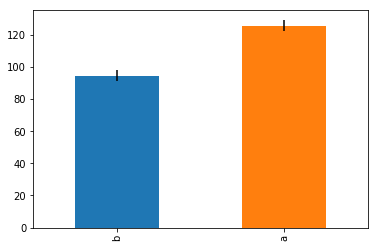

In [17]:
means = df.loc[ 'mean' ]
errs = df.loc[ 'std' ]

ax = means.plot( kind = 'bar', yerr = errs )